In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 999)

In [3]:
name_basics = pd.read_csv('../data/zippedData/imdb.name.basics.csv')
title_akas = pd.read_csv('../data/zippedData/imdb.title.akas.csv')
title_basics = pd.read_csv('../data/zippedData/imdb.title.basics.csv')
title_crew = pd.read_csv('../data/zippedData/imdb.title.crew.csv')
title_principals = pd.read_csv('../data/zippedData/imdb.title.principals.csv')
title_ratings = pd.read_csv('../data/zippedData/imdb.title.ratings.csv')

In [4]:
import warnings
warnings.filterwarnings('ignore')

# IMDB Name Basics

In [5]:
name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [6]:
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [7]:
name_basics.isna().sum()

nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

In [8]:
name_basics.duplicated().sum()

0

# Removing the deceased

In [9]:
name_basics = name_basics[(name_basics['death_year'].isna())]
name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [10]:
name_basics.isna().sum()

nconst                     0
primary_name               0
birth_year            523401
death_year            599865
primary_profession     50548
known_for_titles       30099
dtype: int64

In [11]:
name_basics['directors'] = name_basics['nconst']
name_basics['writers'] = name_basics['nconst']

In [12]:
name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors,writers
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",nm0061671,nm0061671
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",nm0061865,nm0061865
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898",nm0062070,nm0062070
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387",nm0062195,nm0062195
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256",nm0062798,nm0062798
...,...,...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN,nm9990381,nm9990381
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130",nm9990690,nm9990690
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610",nm9991320,nm9991320
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN,nm9991786,nm9991786


In [13]:
name_basics.duplicated().sum()

0

# IMDB Title AKAS

In [14]:
title_akas

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [15]:
title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [16]:
title_akas.isna().sum()

title_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

# Renaming first column to match for merge

In [17]:
title_akas.rename(columns = {'title_id':'tconst'},inplace=True)

In [18]:
title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tconst             331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [19]:
title_akas.duplicated().sum()

0

# IMDB Title Basics

In [20]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [21]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [22]:
title_basics.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [23]:
title_basics.duplicated().sum()

0

# Replacing the runtime_minutes with the mean of the column since we're only missing 20% of our data

In [24]:
title_basics['runtime_minutes'].fillna(title_basics['runtime_minutes'].mean(), inplace=True)

In [25]:
title_basics.isna().sum()

tconst                0
primary_title         0
original_title       21
start_year            0
runtime_minutes       0
genres             5408
dtype: int64

# IMDB Title Crew

In [26]:
title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [27]:
title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [28]:
title_crew.isna().sum()

tconst           0
directors     5727
writers      35883
dtype: int64

In [29]:
title_crew.duplicated().sum()

0

# IMDB Title Principals

In [30]:
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [31]:
title_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [32]:
title_principals.isna().sum()

tconst             0
ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64

In [33]:
title_principals.duplicated().sum()

0

# IMDB Title Ratings

In [34]:
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [35]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [36]:
title_ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [37]:
title_ratings.duplicated().sum()

0

# Merging all tables

In [38]:
name_principals = pd.merge(name_basics, title_principals, on='nconst')
name_principals

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors,writers,tconst,ordering,category,job,characters
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",nm0061671,nm0061671,tt2398241,9,producer,producer,NaN
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",nm0061865,nm0061865,tt0433397,7,composer,NaN,NaN
2,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",nm0061865,nm0061865,tt1681372,8,composer,NaN,NaN
3,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",nm0061865,nm0061865,tt2387710,8,composer,NaN,NaN
4,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",nm0061865,nm0061865,tt2281215,7,composer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016064,nm9990381,Susan Grobes,NaN,NaN,actress,NaN,nm9990381,nm9990381,tt6527982,2,actress,NaN,"[""Cheryl"",""Gypsy""]"
1016065,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130",nm9990690,nm9990690,tt8737130,4,actress,NaN,NaN
1016066,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610",nm9991320,nm9991320,tt8734436,3,actress,NaN,"[""Anna""]"
1016067,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN,nm9991786,nm9991786,tt8739240,9,producer,producer,NaN


In [39]:
name_principals_ratings = pd.merge(name_principals, title_ratings, on='tconst')
name_principals_ratings

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors,writers,tconst,ordering,category,job,characters,averagerating,numvotes
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",nm0061671,nm0061671,tt2398241,9,producer,producer,NaN,6.0,15612
1,nm0038432,Kelly Asbury,1960.0,NaN,"art_department,animation_department,director","tt0298148,tt0101414,tt0166813,tt0377981",nm0038432,nm0038432,tt2398241,5,director,NaN,NaN,6.0,15612
2,nm0449549,Jordan Kerner,NaN,NaN,"producer,actor,executive","tt0101921,tt0141369,tt0119190,tt0108333",nm0449549,nm0449549,tt2398241,10,producer,producer,NaN,6.0,15612
3,nm0962596,Pamela Ribon,1975.0,NaN,"writer,producer,actress","tt0898332,tt3521164,tt5848272,tt2458776",nm0962596,nm0962596,tt2398241,7,writer,written by,NaN,6.0,15612
4,nm0542133,Joe Manganiello,1976.0,NaN,"actor,stunts,producer","tt0974015,tt2268016,tt0844441,tt0837156",nm0542133,nm0542133,tt2398241,3,actor,NaN,"[""Hefty Smurf""]",6.0,15612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621361,nm8482246,Marco Niemeijer,NaN,NaN,"director,writer,cinematographer","tt7708926,tt5132170",nm8482246,nm8482246,tt7708926,1,director,NaN,NaN,7.0,9
621362,nm6870672,Sandy Ding,NaN,NaN,"director,writer,producer","tt6441144,tt4150214,tt5918088",nm6870672,nm6870672,tt5918088,1,director,NaN,NaN,7.5,20
621363,nm6930231,Park Bum-Soo,NaN,NaN,"director,writer","tt4219354,tt4773564",nm6930231,nm6930231,tt4773564,1,director,NaN,NaN,5.6,7
621364,nm8481580,Aleksey Bystritskiy,NaN,NaN,director,"tt6112166,tt7424890",nm8481580,nm8481580,tt6112166,1,director,NaN,NaN,4.8,5


In [40]:
name_principals_ratings_crew = pd.merge(title_crew, name_principals_ratings, on='tconst')
name_principals_ratings_crew

,tconst,directors_x,writers_x,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors_y,writers_y,ordering,category,job,characters,averagerating,numvotes
0,tt0285252,nm0899854,nm0899854,nm0120025,Kim Bullard,NaN,NaN,"composer,soundtrack,music_department","tt0147800,tt0117865,tt0372588,tt8889506",nm0120025,nm0120025,9,composer,NaN,NaN,3.9,219
1,tt0285252,nm0899854,nm0899854,nm0000686,Christopher Walken,1943.0,NaN,"actor,soundtrack,miscellaneous","tt0077416,tt0264464,tt1931533,tt0427327",nm0000686,nm0000686,3,actor,NaN,"[""Roy Callahan""]",3.9,219
2,tt0285252,nm0899854,nm0899854,nm0899854,Tony Vitale,1964.0,NaN,"producer,director,writer","tt0285252,tt0106489,tt0119465,tt0359774",nm0899854,nm0899854,5,director,NaN,NaN,3.9,219
3,tt0285252,nm0899854,nm0899854,nm0001822,Robert Wagner,1930.0,NaN,"actor,producer,soundtrack","tt0072308,tt0118655,tt0295178,tt0106770",nm0001822,nm0001822,4,actor,NaN,"[""Tom Wald""]",3.9,219
4,tt0285252,nm0899854,nm0899854,nm0009272,Richard Gilbert Abramson,NaN,NaN,"producer,director","tt0096926,tt0114658,tt0090500,tt0089791",nm0009272,nm0009272,6,producer,producer,NaN,3.9,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621361,tt9004986,nm4993825,nm4993825,nm1145570,John Erik Kaada,1975.0,NaN,"composer,music_department,soundtrack","tt3202392,tt3650484,tt3346824,tt1153110",nm1145570,nm1145570,7,composer,NaN,NaN,8.4,7
621362,tt9004986,nm4993825,nm4993825,nm4993825,Fredrik Horn Akselsen,NaN,NaN,"director,writer,assistant_director","tt2368989,tt9737848,tt9004986,tt4517204",nm4993825,nm4993825,5,director,NaN,NaN,8.4,7
621363,tt9004986,nm4993825,nm4993825,nm6197807,Torstein Nodland,NaN,NaN,"cinematographer,camera_department","tt9004986,tt8571630,tt3447810,tt9737848",nm6197807,nm6197807,9,cinematographer,NaN,NaN,8.4,7
621364,tt9004986,nm4993825,nm4993825,nm6450115,Thomas Kjær Olsen,NaN,NaN,actor,tt3688926,nm6450115,nm6450115,3,actor,NaN,"[""Young Mads Ousdal""]",8.4,7


In [41]:
name_principals_ratings_crew_basics = pd.merge(title_basics, name_principals_ratings_crew, on='tconst')
name_principals_ratings_crew_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors_x,writers_x,nconst,primary_name,...,primary_profession,known_for_titles,directors_y,writers_y,ordering,category,job,characters,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",nm0347899,Gulzar,...,"music_department,writer,soundtrack","tt0091256,tt0178186,tt1010048,tt2176013",nm0347899,nm0347899,8,writer,dialogue,NaN,7.0,77
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",nm0904537,Vyjayanthimala,...,"actress,music_department,miscellaneous","tt0047990,tt0054910,tt0050665,tt0058547",nm0904537,nm0904537,2,actress,NaN,"[""Munni"",""Laila-E-Aasmaan""]",7.0,77
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",nm0474801,Dilip Kumar,...,"actor,writer,director","tt0058287,tt0054910,tt0047990,tt0084667",nm0474801,nm0474801,1,actor,NaN,"[""Kundan S. Prasad"",""Bajrangi""]",7.0,77
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",nm1391276,Anjana Rawail,...,"writer,costume_designer","tt0293499,tt0266712,tt0266757,tt0063540",nm1391276,nm1391276,9,writer,screenplay,NaN,7.0,77
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,NaN,nm0451809,Arun Khopkar,...,"director,actor,assistant_director","tt0231382,tt0231583,tt0232192,tt3693912",nm0451809,nm0451809,2,actor,NaN,"[""Kalidasa""]",7.2,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621361,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,nm5684093,NaN,nm4241788,Tobias Borkert,...,"composer,music_department","tt8129666,tt6264034,tt1641810,tt4653186",nm4241788,nm4241788,4,composer,NaN,NaN,6.5,11
621362,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,nm5684093,NaN,nm3256778,Tom Denoyette,...,"editor,editorial_department","tt1625150,tt7431570,tt5492502,tt2878178",nm3256778,nm3256778,6,editor,NaN,NaN,6.5,11
621363,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,nm5684093,NaN,nm6969694,Rogier Timmermans,...,"cinematographer,camera_department","tt4160582,tt7941300",nm6969694,nm6969694,5,cinematographer,NaN,NaN,6.5,11
621364,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,nm5684093,NaN,nm6460816,Nils Leidal,...,NaN,tt3698384,nm6460816,nm6460816,1,self,NaN,"[""Himself""]",6.5,11


# Final Table Merge

In [42]:
pd.set_option('display.max_columns', 500)

In [43]:
final_merge = pd.merge(title_akas, name_principals_ratings_crew_basics, on='tconst')
final_merge

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,directors_x,writers_x,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors_y,writers_y,ordering_y,category,job,characters,averagerating,numvotes
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0339460,Judy Greer,1975.0,NaN,"actress,producer,soundtrack","tt0369610,tt0337563,tt0478970,tt0988595",nm0339460,nm0339460,4,actress,NaN,"[""Karen""]",7.0,539338
1,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0695435,Chris Pratt,1979.0,NaN,"actor,soundtrack,producer","tt1490017,tt0369610,tt1266020,tt2015381",nm0695435,nm0695435,1,actor,NaN,"[""Owen""]",7.0,539338
2,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0397171,Bryce Dallas Howard,1981.0,NaN,"actress,director,writer","tt1454029,tt0369610,tt1800302",nm0397171,nm0397171,2,actress,NaN,"[""Claire""]",7.0,539338
3,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0798646,Amanda Silver,1963.0,NaN,"writer,producer,actress","tt2103281,tt1318514,tt0369610,tt3450958",nm0798646,nm0798646,7,writer,screenplay by,NaN,7.0,539338
4,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",nm1119880,nm1119880,5,director,NaN,NaN,7.0,539338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380443,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm5282266,Mugi Kadowaki,NaN,NaN,actress,"tt3108170,tt4651928,tt9827784,tt8764582",nm5282266,nm5282266,1,actress,NaN,"[""Haru""]",7.7,6
2380444,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm5862455,Nana Komatsu,NaN,NaN,"actress,soundtrack","tt4912452,tt0490215,tt5108912,tt3108158",nm5862455,nm5862455,2,actress,NaN,"[""Reo""]",7.7,6
2380445,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm4869921,Masaki Naito,1981.0,NaN,actor,"tt7268368,tt2267524,tt9827784,tt3502172",nm4869921,nm4869921,10,actor,NaN,NaN,7.7,6
2380446,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm6954008,Ryô Narita,NaN,NaN,actor,"tt10127410,tt5311514,tt5031744,tt8531044",nm6954008,nm6954008,3,actor,NaN,"[""Shima""]",7.7,6


In [44]:
temp_table = final_merge
temp_table_1 = temp_table[temp_table['known_for_titles'].notna()]
temp_table_1

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,directors_x,writers_x,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors_y,writers_y,ordering_y,category,job,characters,averagerating,numvotes
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0339460,Judy Greer,1975.0,NaN,"actress,producer,soundtrack","tt0369610,tt0337563,tt0478970,tt0988595",nm0339460,nm0339460,4,actress,NaN,"[""Karen""]",7.0,539338
1,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0695435,Chris Pratt,1979.0,NaN,"actor,soundtrack,producer","tt1490017,tt0369610,tt1266020,tt2015381",nm0695435,nm0695435,1,actor,NaN,"[""Owen""]",7.0,539338
2,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0397171,Bryce Dallas Howard,1981.0,NaN,"actress,director,writer","tt1454029,tt0369610,tt1800302",nm0397171,nm0397171,2,actress,NaN,"[""Claire""]",7.0,539338
3,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0798646,Amanda Silver,1963.0,NaN,"writer,producer,actress","tt2103281,tt1318514,tt0369610,tt3450958",nm0798646,nm0798646,7,writer,screenplay by,NaN,7.0,539338
4,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",nm1119880,nm1119880,5,director,NaN,NaN,7.0,539338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380443,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm5282266,Mugi Kadowaki,NaN,NaN,actress,"tt3108170,tt4651928,tt9827784,tt8764582",nm5282266,nm5282266,1,actress,NaN,"[""Haru""]",7.7,6
2380444,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm5862455,Nana Komatsu,NaN,NaN,"actress,soundtrack","tt4912452,tt0490215,tt5108912,tt3108158",nm5862455,nm5862455,2,actress,NaN,"[""Reo""]",7.7,6
2380445,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm4869921,Masaki Naito,1981.0,NaN,actor,"tt7268368,tt2267524,tt9827784,tt3502172",nm4869921,nm4869921,10,actor,NaN,NaN,7.7,6
2380446,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm6954008,Ryô Narita,NaN,NaN,actor,"tt10127410,tt5311514,tt5031744,tt8531044",nm6954008,nm6954008,3,actor,NaN,"[""Shima""]",7.7,6


In [45]:
z = [i.split(',') for i in temp_table_1['known_for_titles']]
temp_table_1['list_of_known'] = z
temp_table_1

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,directors_x,writers_x,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors_y,writers_y,ordering_y,category,job,characters,averagerating,numvotes,list_of_known
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0339460,Judy Greer,1975.0,NaN,"actress,producer,soundtrack","tt0369610,tt0337563,tt0478970,tt0988595",nm0339460,nm0339460,4,actress,NaN,"[""Karen""]",7.0,539338,"[tt0369610, tt0337563, tt0478970, tt0988595]"
1,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0695435,Chris Pratt,1979.0,NaN,"actor,soundtrack,producer","tt1490017,tt0369610,tt1266020,tt2015381",nm0695435,nm0695435,1,actor,NaN,"[""Owen""]",7.0,539338,"[tt1490017, tt0369610, tt1266020, tt2015381]"
2,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0397171,Bryce Dallas Howard,1981.0,NaN,"actress,director,writer","tt1454029,tt0369610,tt1800302",nm0397171,nm0397171,2,actress,NaN,"[""Claire""]",7.0,539338,"[tt1454029, tt0369610, tt1800302]"
3,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0798646,Amanda Silver,1963.0,NaN,"writer,producer,actress","tt2103281,tt1318514,tt0369610,tt3450958",nm0798646,nm0798646,7,writer,screenplay by,NaN,7.0,539338,"[tt2103281, tt1318514, tt0369610, tt3450958]"
4,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",nm1119880,nm1119880,5,director,NaN,NaN,7.0,539338,"[tt0369610, tt4881806, tt4572792, tt1862079]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380443,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm5282266,Mugi Kadowaki,NaN,NaN,actress,"tt3108170,tt4651928,tt9827784,tt8764582",nm5282266,nm5282266,1,actress,NaN,"[""Haru""]",7.7,6,"[tt3108170, tt4651928, tt9827784, tt8764582]"
2380444,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm5862455,Nana Komatsu,NaN,NaN,"actress,soundtrack","tt4912452,tt0490215,tt5108912,tt3108158",nm5862455,nm5862455,2,actress,NaN,"[""Reo""]",7.7,6,"[tt4912452, tt0490215, tt5108912, tt3108158]"
2380445,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm4869921,Masaki Naito,1981.0,NaN,actor,"tt7268368,tt2267524,tt9827784,tt3502172",nm4869921,nm4869921,10,actor,NaN,NaN,7.7,6,"[tt7268368, tt2267524, tt9827784, tt3502172]"
2380446,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",nm0794048,nm0794048,nm6954008,Ryô Narita,NaN,NaN,actor,"tt10127410,tt5311514,tt5031744,tt8531044",nm6954008,nm6954008,3,actor,NaN,"[""Shima""]",7.7,6,"[tt10127410, tt5311514, tt5031744, tt8531044]"


In [46]:
testing = zip(title_basics['tconst'], title_basics['original_title'])
testing_1 = {t: o for t, o in testing}
testing_1['tt0369610']

'Jurassic World'

In [47]:
writers_1 = zip()

In [48]:
def title_finder(list_of_tconst):
    names = []
    for tconst in list_of_tconst:
        try:
            names.append(testing_1[tconst])
        except:
            names.append('no_title')
    return names
        
    

In [49]:
title_finder(temp_table_1['list_of_known'][0])

['Jurassic World', 'no_title', 'Ant-Man', 'no_title']

In [50]:
temp_table_1['the_list_of_known'] = temp_table_1['list_of_known'].apply(title_finder)

In [51]:
temp_table_1.head()

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,directors_x,writers_x,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors_y,writers_y,ordering_y,category,job,characters,averagerating,numvotes,list_of_known,the_list_of_known
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0339460,Judy Greer,1975.0,NaN,"actress,producer,soundtrack","tt0369610,tt0337563,tt0478970,tt0988595",nm0339460,nm0339460,4,actress,NaN,"[""Karen""]",7.0,539338,"[tt0369610, tt0337563, tt0478970, tt0988595]","[Jurassic World, no_title, Ant-Man, no_title]"
1,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0695435,Chris Pratt,1979.0,NaN,"actor,soundtrack,producer","tt1490017,tt0369610,tt1266020,tt2015381",nm0695435,nm0695435,1,actor,NaN,"[""Owen""]",7.0,539338,"[tt1490017, tt0369610, tt1266020, tt2015381]","[The Lego Movie, Jurassic World, no_title, Gua..."
2,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0397171,Bryce Dallas Howard,1981.0,NaN,"actress,director,writer","tt1454029,tt0369610,tt1800302",nm0397171,nm0397171,2,actress,NaN,"[""Claire""]",7.0,539338,"[tt1454029, tt0369610, tt1800302]","[The Help, Jurassic World, Gold]"
3,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm0798646,Amanda Silver,1963.0,NaN,"writer,producer,actress","tt2103281,tt1318514,tt0369610,tt3450958",nm0798646,nm0798646,7,writer,screenplay by,NaN,7.0,539338,"[tt2103281, tt1318514, tt0369610, tt3450958]","[Dawn of the Planet of the Apes, Rise of the P..."
4,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",nm1119880,nm1119880,5,director,NaN,NaN,7.0,539338,"[tt0369610, tt4881806, tt4572792, tt1862079]","[Jurassic World, Jurassic World: Fallen Kingdo..."


# Final Merge Clean Up

In [52]:
final_merge.drop('death_year', 1, inplace=True)
final_merge.drop('ordering_y', 1, inplace=True)
final_merge.drop('writers_y', 1, inplace=True)
final_merge.drop('directors_y', 1, inplace=True)


# Top 10 Genres

In [109]:
# Filtering genres by value counts
list_of_genres = final_merge['genres'].value_counts()[:50]
#All genres with a total number of votes greater than 30000
all_genres = final_merge[(final_merge['genres'].isin(list_of_genres.index)) &\
                         (final_merge['numvotes'] >= 30000)&\
                         (final_merge['start_year'] >= 2010)]
#Filtering genre value counts based on above filter
all_genres = all_genres['genres'].value_counts()
#Filtering genres based on total value counts greater than 5000 (mean = 5610.760869565217)
all_genres_greater_100 = all_genres.values >= 5000
#Filtering genres with a count over 100 against the all_genres filter
the_genres_name = all_genres[all_genres_greater_100]
#Filtering the_genres_name against the complete dataset
filter_with_full_table = final_merge[(final_merge['genres'].isin(the_genres_name.index))]
#Dropping duplicate tconst values
genre_drop_duplicates = filter_with_full_table.drop_duplicates(subset = 'tconst')
#Creating a table of top 10 genres excluding the top 6 which are documentaries or biographies
top_10_genres = pd.DataFrame(genre_drop_duplicates.groupby('genres')['averagerating'].mean().sort_values(ascending = False))[:10]
#Resetting the index
top_10_genres = top_10_genres.reset_index()
top_10_genres

,genres,averagerating
0,"Biography,Drama,History",6.768675
1,"Action,Adventure,Animation",6.523750
2,Drama,6.467085
3,"Comedy,Drama",6.338154
4,"Drama,Romance",6.269805
5,"Comedy,Drama,Romance",6.267208
6,"Crime,Drama,Mystery",6.213397
7,"Crime,Drama,Thriller",6.132186
8,"Drama,Thriller",6.117965
9,"Action,Crime,Drama",5.986232


# Top Genres US

In [107]:
# Filtering genres by value counts
list_of_genres = final_merge['genres'].value_counts()[:50]
#All US genres with a total number of votes greater than 30000
all_genres_us = final_merge[(final_merge['genres'].isin(list_of_genres.index)) &\
                         (final_merge['numvotes'] >= 30000)&\
                         (final_merge['start_year'] >= 2010)&\
                         (final_merge['region'] == 'US')]
#Filtering US genre value counts based on above filter
all_genres_us = all_genres_us['genres'].value_counts()
#Filtering US genres based on total value counts greater than 250 (mean = 294.39130434782606)
all_genres_us_greater_100 = all_genres_us.values >= 100
#Filtering US genres with a count over 100 against the all_genres filter
the_genres_us_name = all_genres_us[all_genres_us_greater_100]
#Filtering US the_genres_name against the complete dataset
filter_with_full_table_us = final_merge[(final_merge['genres'].isin(the_genres_us_name.index))]
#Dropping duplicate tconst values
genre_drop_duplicates_us = filter_with_full_table_us.drop_duplicates(subset = 'tconst')
#Creating a table of top US 10 genres
top_10_genres_us = pd.DataFrame(genre_drop_duplicates_us.groupby('genres')['averagerating'].mean().sort_values(ascending = False))[:10]
#Resetting the index
top_10_genres_us = top_10_genres_us.reset_index()
top_10_genres_us

,genres,averagerating
0,"Biography,Comedy,Drama",6.951899
1,"Biography,Drama,History",6.768675
2,"Biography,Drama",6.607407
3,"Action,Adventure,Animation",6.523750
4,"Adventure,Comedy,Drama",6.480137
5,Drama,6.467085
6,"Crime,Drama",6.376409
7,"Comedy,Drama",6.338154
8,"Drama,Romance",6.269805
9,"Comedy,Drama,Romance",6.267208


# Top Genres Foreign US

In [106]:
# Filtering genres by value counts
list_of_genres = final_merge['genres'].value_counts()[:50]
#All foreign genres with a total number of votes greater than 30000
all_genres_not_us = final_merge[(final_merge['genres'].isin(list_of_genres.index)) &\
                         (final_merge['numvotes'] >= 30000)&\
                         (final_merge['start_year'] >= 2010)&\
                         (final_merge['region'] != 'US')]
#Filtering foreign genre value counts based on above filter
all_genres_not_us = all_genres_not_us['genres'].value_counts()
#Filtering foreign genres based on total value counts greater than 5000 (mean = 5316.369565217391)
all_genres_not_us_greater_100 = all_genres_not_us.values >= 5000
#Filtering foreign genres with a count over 100 against the all_genres filter
the_genres_not_us_name = all_genres_not_us[all_genres_not_us_greater_100]
#Filtering the_genres_name against the complete dataset
filter_with_full_table_not_us = final_merge[(final_merge['genres'].isin(the_genres_not_us_name.index))]
#Dropping duplicate tconst values
genre_drop_duplicates_not_us = filter_with_full_table_not_us.drop_duplicates(subset = 'tconst')
#Creating a table of top 10 foreign genres
top_10_genres_not_us = pd.DataFrame(genre_drop_duplicates_not_us.groupby('genres')['averagerating'].mean().sort_values(ascending = False))[:10]
#Resetting the index
top_10_genres_not_us = top_10_genres_not_us.reset_index()
top_10_genres_not_us

,genres,averagerating
0,"Biography,Drama,History",6.768675
1,"Action,Adventure,Animation",6.523750
2,Drama,6.467085
3,"Comedy,Drama",6.338154
4,"Drama,Romance",6.269805
5,"Comedy,Drama,Romance",6.267208
6,"Crime,Drama,Mystery",6.213397
7,"Crime,Drama,Thriller",6.132186
8,"Drama,Thriller",6.117965
9,"Action,Crime,Drama",5.986232


# Top Directors

In [112]:
#All directors appearing in original title movies with a total number of votes greater than 30000
all_directors = final_merge[(final_merge['category'] == 'director') &\
                            (final_merge['numvotes'] >= 30000)&\
                            (final_merge['start_year'] >= 2010)]
#Total movies directors have appeared in based on above filter 
all_directors_name = all_directors['primary_name'].value_counts()
#Filtering director names that appear more than 40 times (mean = 46.79087048832272)
all_directors_name_greater_3 = all_directors_name.values >= 40
#Filtered names list vs greater than 3 list
the_directors_name = all_directors_name[all_directors_name_greater_3]
#Filtering top directors by name against the overall data set
top_directors = final_merge[(final_merge['primary_name'].isin(the_directors_name.index))]
#Dropping duplicate tconst values
the_directors_name_no_duplicates = top_directors.drop_duplicates(subset = 'tconst')
#Creating dataframe to show top 10 directors
top_10_directors = pd.DataFrame(the_directors_name_no_duplicates.groupby('primary_name')\
                                    ['averagerating'].mean().sort_values(ascending = False)[:10])

top_10_directors = top_10_directors.reset_index()
top_10_directors

,primary_name,averagerating
0,Anthony Russo,9.000000
1,Lee Unkrich,8.400000
2,Andrew Stanton,8.300000
3,Pete Docter,8.250000
4,Jared Bush,8.250000
5,Damián Szifron,8.100000
6,Joe Russo,8.020000
7,Christopher Nolan,8.016667
8,Stephen Chbosky,8.000000
9,Nuri Bilge Ceylan,7.950000


# Top 10 Foreign Directors

In [115]:
#All directors appearing in original title movies with a total number of votes greater than 30000
all_directors_foreign = final_merge[(final_merge['category'] == 'director') &\
                            (final_merge['numvotes'] >= 30000)&\
                            (final_merge['region'] != 'US')&\
                            (final_merge['start_year'] >= 2010)]
#Total foreign directors based on above filter by value count
all_directors_name_foreign = all_directors['primary_name'].value_counts()
#Filtering foreign director names that appear more than 40 times (mean = 46.79087048832272)
all_directors_name_greater_3_foreign = all_directors_name_foreign.values >= 40
#Filtered foreign names list vs greater than 3 list
the_directors_name_foreign = all_directors_name_foreign[all_directors_name_greater_3_foreign]
#Filtering top directors by name against the overall data set
top_directors_foreign = final_merge[(final_merge['primary_name'].isin(the_directors_name_foreign.index))]
#Dropping duplicate tconst values
the_directors_name_no_duplicates_foreign = top_directors_foreign.drop_duplicates(subset = 'tconst')
#Creating dataframe to show top 10 foreign directors
top_10_directors_foreign = pd.DataFrame(the_directors_name_no_duplicates_foreign.groupby('primary_name')\
                                    ['averagerating'].mean().sort_values(ascending = False)[:10])

top_10_directors_foreign = top_10_directors_foreign.reset_index()
top_10_directors_foreign

,primary_name,averagerating
0,Anthony Russo,9.000000
1,Lee Unkrich,8.400000
2,Andrew Stanton,8.300000
3,Pete Docter,8.250000
4,Jared Bush,8.250000
5,Damián Szifron,8.100000
6,Joe Russo,8.020000
7,Christopher Nolan,8.016667
8,Stephen Chbosky,8.000000
9,Nuri Bilge Ceylan,7.950000


In [119]:
#All directors appearing in original title movies with a total number of votes greater than 30000
all_directors_us = final_merge[(final_merge['category'] == 'director') &\
                            (final_merge['numvotes'] >= 30000)&\
                            (final_merge['region'] == 'US')&\
                            (final_merge['start_year'] >= 2010)]
#Total US directors based on above filter by value count
all_directors_name_us = all_directors['primary_name'].value_counts()
#Filtering US director names that appear more than 40 times (mean = 46.79087048832272)
all_directors_name_greater_3_us = all_directors_name_us.values >= 40
#Filtered US names list vs greater than 3 list
the_directors_name_us = all_directors_name_us[all_directors_name_greater_3_us]
#Filtering top US directors by name against the overall data set
top_directors_us = final_merge[(final_merge['primary_name'].isin(the_directors_name_us.index))]
#Dropping duplicate tconst values
the_directors_name_no_duplicates_us = top_directors_us.drop_duplicates(subset = 'tconst')
#Creating dataframe to show top 10 US directors
top_10_directors_us = pd.DataFrame(the_directors_name_no_duplicates_us.groupby('primary_name')\
                                    ['averagerating'].mean().sort_values(ascending = False)[:10])

top_10_directors_us = top_10_directors_us.reset_index()
top_10_directors_us

,primary_name,averagerating
0,Anthony Russo,9.000000
1,Lee Unkrich,8.400000
2,Andrew Stanton,8.300000
3,Pete Docter,8.250000
4,Jared Bush,8.250000
5,Damián Szifron,8.100000
6,Joe Russo,8.020000
7,Christopher Nolan,8.016667
8,Stephen Chbosky,8.000000
9,Nuri Bilge Ceylan,7.950000


# Top 10 Writers

In [94]:
#All writers appearing in original title movies with a total number of votes greater than 30000
all_writers = final_merge[(final_merge['category'] == 'writer') &\
                          (final_merge['numvotes'] >= 30000)&\
                          (final_merge['start_year'] >= 2010)]                          
#Total writers based on above filter by value count
all_writers_name = all_writers['primary_name'].value_counts()
#Filtering writer names that appear more than 50 times (mean = 43.069139966273184)
all_writers_name_greater_3 = all_writers_name.values >= 43
#Filtered US names list vs greater than 3 list
the_writers_name_ = all_writers_name[all_writers_name_greater_3]
#Filtering top US directors by name against the overall data set
top_writers = final_merge[(final_merge['primary_name'].isin(the_writers_name.index))]
#Dropping duplicate tconst values
the_writers_name_no_duplicates = top_writers.drop_duplicates(subset = 'tconst')
#Creating dataframe to show top 10 writers
top_10_writers= pd.DataFrame(the_writers_name_no_duplicates.groupby('primary_name')\
                                    ['averagerating'].mean().sort_values(ascending = False)[:10])

top_10_writers = top_10_writers.reset_index()
top_10_writers

,primary_name,averagerating
0,Benjamin Bratt,9.200000
1,Taylor Kitsch,8.600000
2,Andrew Garfield,8.333333
3,Jacob Tremblay,8.200000
4,Eddie Murphy,8.200000
5,Don Cheadle,8.160000
6,Kevin T. Collins,7.833333
7,Steve Martin,7.800000
8,Fawad Khan,7.700000
9,Jai Courtney,7.700000


# Top 10 Foreign Writers

In [122]:
#All foreign writers appearing in original title movies with a total number of votes greater than 30000
all_writers_foreign = final_merge[(final_merge['category'] == 'writer') &\
                          (final_merge['numvotes'] >= 30000)&\
                          (final_merge['region'] != 'US')&\
                          (final_merge['start_year'] >= 2010)]                         
#Total writers based on above filter by value count
all_writers_name_foreign = all_writers_foreign['primary_name'].value_counts()
#Filtering foreignwriter names that appear more than 35 times (mean = 40.83080382237212)
all_writers_name_greater_3_foreign = all_writers_name_foreign.values >= 35
#Filtered US names list vs greater than 3 list
the_writers_name_foreign = all_writers_name_foreign[all_writers_name_greater_3_foreign]
#Filtering top US directors by name against the overall data set
top_writers_foreign = final_merge[(final_merge['primary_name'].isin(the_writers_name_foreign.index))]
#Dropping duplicate tconst values
the_writers_name_no_duplicates_foreign = top_writers_foreign.drop_duplicates(subset = 'tconst')
#Creating dataframe to show top 10 foreign writers
top_10_writers_foreign = pd.DataFrame(the_writers_name_no_duplicates_foreign.groupby('primary_name')\
                                    ['averagerating'].mean().sort_values(ascending = False)[:10])

top_10_writers_foreign = top_10_writers_foreign.reset_index()
top_10_writers_foreign

,primary_name,averagerating
0,Josh Cooley,8.60
1,Philippe Pozzo di Borgo,8.50
2,Adrian Molina,8.40
3,Jared Bush,8.25
4,Terence Winter,8.20
5,Ebru Ceylan,8.10
6,Keith Giffen,8.10
7,Kathryn Stockett,8.10
8,Hugo Guinness,8.10
9,Germán Servidio,8.10


# Top Writers US

In [125]:
#All US writers appearing in original title movies with a total number of votes greater than 30000
all_writers_us = final_merge[(final_merge['category'] == 'writer') &\
                          (final_merge['numvotes'] >= 30000)&\
                          (final_merge['region'] == 'US')&\
                          (final_merge['start_year'] >= 2010)]                        
#Total writers based on above filter by value count
all_writers_name_us = all_writers_us['primary_name'].value_counts()
#Filtering foreignwriter names that appear more than 2 times (mean = 2.584036340038936)
all_writers_name_greater_3_us = all_writers_name_us.values >= 2
#Filtered US names list vs greater than 3 list
the_writers_name_us = all_writers_name_us[all_writers_name_greater_3_us]
#Filtering top US directors by name against the overall data set
top_writers_us = final_merge[(final_merge['primary_name'].isin(the_writers_name_us.index))]
#Dropping duplicate tconst values
the_writers_name_no_duplicates_us = top_writers_us.drop_duplicates(subset = 'tconst')
#Creating dataframe to show top 10 US writers
top_10_writers_us = pd.DataFrame(the_writers_name_no_duplicates_us.groupby('primary_name')\
                                    ['averagerating'].mean().sort_values(ascending = False)[:10])

top_10_writers_us = top_10_writers_us.reset_index()
top_10_writers_us

,primary_name,averagerating
0,Gale Anne Hurd,8.800000
1,Josh Cooley,8.600000
2,Elizabeth Gilbert,8.450000
3,Jason Katz,8.400000
4,Michael Chabon,8.100000
5,Keith Giffen,8.100000
6,Tony Kushner,8.066667
7,Christopher Nolan,8.016667
8,Spike Jonze,7.933333
9,Kim Krizan,7.900000


# Top 10 Actress

In [135]:
#All actresses appearing in original title movies with a total number of votes greater than 30000
all_actress = final_merge[(final_merge['category'] == 'actress') &\
                          (final_merge['numvotes'] >= 30000)&\
                          (final_merge['start_year'] >= 2010)]
                                                 
#Total actress based on above filter by value count
all_actress_name = all_actress['primary_name'].value_counts()
#Filtering actress names that appear more than 50 times (mean = 57.51372549019608)
all_actress_name_greater_3 = all_actress_name.values >= 50
#Filtered names list vs greater than 3 list
the_actress_name = all_actress_name[all_actress_name_greater_3]
#Filtering top  actress by name against the overall data set
top_actress = final_merge[(final_merge['primary_name'].isin(the_actress_name.index))]
#Dropping duplicate tconst values
the_actress_name_no_duplicates = top_actress.drop_duplicates(subset = 'tconst')
#Creating dataframe to show top 10 actresses
top_10_actress = pd.DataFrame(the_actress_name_no_duplicates.groupby('primary_name')\
                                    ['averagerating'].mean().sort_values(ascending = False)[:10])

top_10_actress = top_10_actress.reset_index()
top_10_actress

,primary_name,averagerating
0,Ginnifer Goodwin,8.000000
1,Julie Andrews,7.800000
2,Karin Konoval,7.550000
3,Rachel House,7.466667
4,Frances Conroy,7.400000
5,Phylicia Rashad,7.400000
6,Carey Mulligan,7.387500
7,Helena Bonham Carter,7.342857
8,Robin Wright,7.220000
9,Scarlett Johansson,7.215385


In [132]:
#All foreign actresses appearing in original title movies with a total number of votes greater than 30000
all_actress_foreign = final_merge[(final_merge['category'] == 'actress') &\
                          (final_merge['numvotes'] >= 30000)&\
                          (final_merge['region'] != 'US')&\
                          (final_merge['start_year'] >= 2010)]                         
#Total foreign actress based on above filter by value count
all_actress_name_foreign = all_actress_foreign['primary_name'].value_counts()
#Filtering foreign actress names that appear more than 50 times (mean = 54.64411764705882)
all_actress_name_greater_3_foreign = all_actress_name_foreign.values >= 50
#Filtered foreign names list vs greater than 3 list
the_actress_name_foreign = all_actress_name_foreign[all_actress_name_greater_3_foreign]
#Filtering top foreign actress by name against the overall data set
top_actress_foreign = final_merge[(final_merge['primary_name'].isin(the_actress_name_foreign.index))]
#Dropping duplicate tconst values
the_actress_name_no_duplicates_foreign = top_actress_foreign.drop_duplicates(subset = 'tconst')
#Creating dataframe to show top 10 foreign actresses
top_10_actress_foreign = pd.DataFrame(the_actress_name_no_duplicates_foreign.groupby('primary_name')\
                                    ['averagerating'].mean().sort_values(ascending = False)[:10])

top_10_actress_foreign = top_10_actress_foreign.reset_index()
top_10_actress_foreign

,primary_name,averagerating
0,Ginnifer Goodwin,8.000000
1,Julie Andrews,7.800000
2,Karin Konoval,7.550000
3,Rachel House,7.466667
4,Phylicia Rashad,7.400000
5,Frances Conroy,7.400000
6,Carey Mulligan,7.387500
7,Helena Bonham Carter,7.342857
8,Robin Wright,7.220000
9,Scarlett Johansson,7.215385


In [128]:
#All US actresses appearing in original title movies with a total number of votes greater than 30000
all_actress_us = final_merge[(final_merge['category'] == 'actress') &\
                          (final_merge['numvotes'] >= 30000)&\
                          (final_merge['region'] == 'US')&\
                          (final_merge['start_year'] >= 2010)]                         
#Total US actress based on above filter by value count
all_actress_name_us = all_actress_us['primary_name'].value_counts()
#Filtering US actress names that appear more than 3 times (mean = 3.3073446327683618)
all_actress_name_greater_3_us = all_actress_name_us.values >= 3
#Filtered US names list vs greater than 3 list
the_actress_name_us = all_actress_name_us[all_actress_name_greater_3_us]
#Filtering top US actress by name against the overall data set
top_actress_us = final_merge[(final_merge['primary_name'].isin(the_actress_name_us.index))]
#Dropping duplicate tconst values
the_actress_name_no_duplicates_us = top_actress_us.drop_duplicates(subset = 'tconst')
#Creating dataframe to show top 10 US actresses
top_10_actress_us = pd.DataFrame(the_actress_name_no_duplicates_us.groupby('primary_name')\
                                    ['averagerating'].mean().sort_values(ascending = False)[:10])

top_10_actress_us = top_10_actress_us.reset_index()
top_10_actress_us

,primary_name,averagerating
0,Ginnifer Goodwin,8.000000
1,Sally Field,7.566667
2,Karin Konoval,7.550000
3,Carey Mulligan,7.387500
4,Helena Bonham Carter,7.342857
5,Robin Wright,7.220000
6,Scarlett Johansson,7.215385
7,Mackenzie Foy,7.175000
8,Sally Hawkins,7.100000
9,Hayley Atwell,7.100000


# Top 10 Actors

In [139]:
#All actors appearing in original title movies with a total number of votes greater than 30000
all_actors = final_merge[(final_merge['category'] == 'actor') &\
                          (final_merge['numvotes'] >= 30000)&\
                          (final_merge['start_year'] >= 2010)]
                                                 
#Total actress based on above filter by value count
all_actor_name = all_actors['primary_name'].value_counts()
#Filtering actress names that appear more than 60 times (66.04397705544933)
all_actor_name_greater_3 = all_actor_name.values >= 60
#Filtered names list vs greater than 3 list
the_actor_name = all_actor_name[all_actor_name_greater_3]
#Filtering top  actress by name against the overall data set
top_actor = final_merge[(final_merge['primary_name'].isin(the_actor_name.index))]
#Dropping duplicate tconst values
the_actor_name_no_duplicates = top_actor.drop_duplicates(subset = 'tconst')
#Creating dataframe to show top 10 actors
top_10_actor = pd.DataFrame(the_actor_name_no_duplicates.groupby('primary_name')\
                                    ['averagerating'].mean().sort_values(ascending = False)[:10])

top_10_actor = top_10_actor.reset_index()
top_10_actor

,primary_name,averagerating
0,Benjamin Bratt,9.200000
1,Andrew Garfield,8.333333
2,Eddie Murphy,8.200000
3,Don Cheadle,8.160000
4,Jaeden Martell,7.766667
5,Jai Courtney,7.700000
6,Leonardo DiCaprio,7.675000
7,Ben Affleck,7.650000
8,Mahershala Ali,7.600000
9,Alan Alda,7.533333


# Top Foreign Actors

In [142]:
#All foreign actors appearing in original title movies with a total number of votes greater than 30000
all_actor_foreign = final_merge[(final_merge['category'] == 'actor') &\
                          (final_merge['numvotes'] >= 30000)&\
                          (final_merge['region'] != 'US')&\
                          (final_merge['start_year'] >= 2010)]                         
#Total foreign actor based on above filter by value count
all_actor_name_foreign = all_actor_foreign['primary_name'].value_counts()
#Filtering foreign actor names that appear more than 55 times (mean = 62.63989802421925)
all_actor_name_greater_3_foreign = all_actor_name_foreign.values >= 55
#Filtered foreign names list vs greater than 3 list
the_actor_name_foreign = all_actor_name_foreign[all_actor_name_greater_3_foreign]
#Filtering top foreign actress by name against the overall data set
top_actor_foreign = final_merge[(final_merge['primary_name'].isin(the_actor_name_foreign.index))]
#Dropping duplicate tconst values
the_actor_name_no_duplicates_foreign = top_actor_foreign.drop_duplicates(subset = 'tconst')
#Creating dataframe to show top 10 foreign actors
top_10_actor_foreign = pd.DataFrame(the_actor_name_no_duplicates_foreign.groupby('primary_name')\
                                    ['averagerating'].mean().sort_values(ascending = False)[:10])

top_10_actor_foreign = top_10_actor_foreign.reset_index()
top_10_actor_foreign

,primary_name,averagerating
0,Benjamin Bratt,9.200000
1,Andrew Garfield,8.333333
2,Eddie Murphy,8.200000
3,Don Cheadle,8.160000
4,Jaeden Martell,7.766667
5,Jai Courtney,7.700000
6,Leonardo DiCaprio,7.675000
7,Ben Affleck,7.650000
8,Mahershala Ali,7.600000
9,Joaquin Phoenix,7.600000


# Top US Actors

In [145]:
#All US actor appearing in original title movies with a total number of votes greater than 30000
all_actor_us = final_merge[(final_merge['category'] == 'actor') &\
                          (final_merge['numvotes'] >= 30000)&\
                          (final_merge['region'] == 'US')&\
                          (final_merge['start_year'] >= 2010)]                         
#Total US actor based on above filter by value count
all_actor_name_us = all_actor_us['primary_name'].value_counts()
#Filtering US actor names that appear more than 3 times (mean = 3.9769173492181684)
all_actor_name_greater_3_us = all_actor_name_us.values >= 3
#Filtered US names list vs greater than 3 list
the_actor_name_us = all_actor_name_us[all_actor_name_greater_3_us]
#Filtering top US actor by name against the overall data set
top_actor_us = final_merge[(final_merge['primary_name'].isin(the_actor_name_us.index))]
#Dropping duplicate tconst values
the_actor_name_no_duplicates_us = top_actor_us.drop_duplicates(subset = 'tconst')
#Creating dataframe to show top 10 US actors
top_10_actor_us = pd.DataFrame(the_actor_name_no_duplicates_us.groupby('primary_name')\
                                    ['averagerating'].mean().sort_values(ascending = False)[:10])

top_10_actor_us = top_10_actor_us.reset_index()
top_10_actor_us

,primary_name,averagerating
0,Benjamin Bratt,9.200000
1,Andrew Garfield,8.333333
2,Barkhad Abdirahman,8.300000
3,Eddie Murphy,8.200000
4,Don Cheadle,8.160000
5,Brad Garrett,8.050000
6,Cory Fernandez,8.000000
7,Jim Parsons,7.992308
8,Steve Martin,7.800000
9,Tyrese Gibson,7.800000


# Correlations?

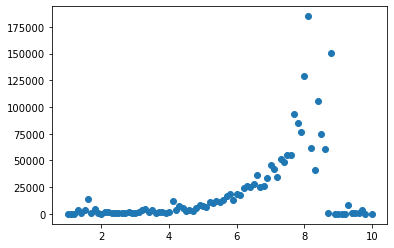

In [62]:
avg_rating = final_merge.groupby('averagerating').mean()
avg_rating.drop(['ordering_x', 'start_year', 'birth_year'], 1, inplace=True)
avg_rating.reset_index(inplace=True)
plt.scatter(avg_rating['averagerating'], avg_rating['numvotes']);


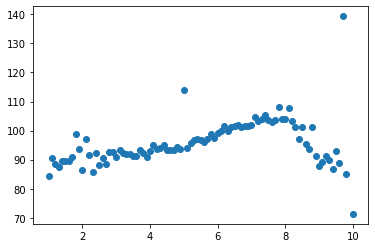

In [63]:
avg_rating = final_merge.groupby('averagerating').mean()
avg_rating.drop(['ordering_x', 'start_year', 'birth_year'], 1, inplace=True)
avg_rating.reset_index(inplace=True)
plt.scatter(avg_rating['averagerating'], avg_rating['runtime_minutes']);

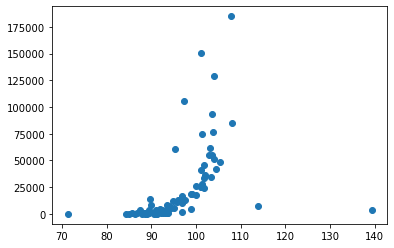

In [64]:
avg_rating = final_merge.groupby('averagerating').mean()
avg_rating.drop(['ordering_x', 'start_year', 'birth_year'], 1, inplace=True)
avg_rating.reset_index(inplace=True)
plt.scatter(avg_rating['runtime_minutes'], avg_rating['numvotes']);

In [65]:
final_merge['numvotes'].mean()


30390.034935440723

In [68]:
total_votes_30000 = final_merge[(final_merge['numvotes'] >= 20000)]

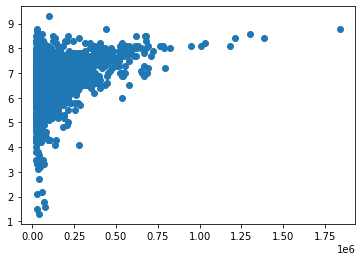

In [71]:
avg_rating = total_votes_30000.groupby('numvotes').mean()
avg_rating.reset_index(inplace=True)
plt.scatter(avg_rating[''], avg_rating['averagerating'])

In [ ]:
avg_rating

In [ ]:
avg_rating.drop(['ordering_x', 'is_original_title', 'birth_year'], 1, inplace=True)

In [ ]:
avg_rating.corr()

In [ ]:
final_merge['category']

In [ ]:
data = [['movie1', '5', 'A', 'A'], ['movie2', '6', 'B', 'B'], ['movie3', '3', 'B', 'B']]
df = pd.DataFrame(data, columns = ['title', 'rating', 'nconst'])

In [ ]:
df